In [160]:
# Pandas for data science
import pandas as pd

# Matplotlib for data visualization
import matplotlib.pyplot as plt
# Seaborn for data visualization
import seaborn as sns

# Steam Games dataset
games = pd.read_csv("/content/games.csv")

In [161]:
# Exploratory Data Analysis


print("Shape: " + str(games.shape))
print("\nNumber of null values:\n" + str(games.isnull().sum()))
print("\nNumber of unique values:\n" + str(games.nunique()))
print("\nData Types:\n" + str(games.dtypes))

Shape: (50872, 13)

Number of null values:
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

Number of unique values:
app_id            50872
title             50751
date_release       4292
win                   2
mac                   2
linux                 2
rating                9
positive_ratio      100
user_reviews       4847
price_final         436
price_original      183
discount             75
steam_deck            2
dtype: int64

Data Types:
app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_de

For 50872 entries, there are 13 information pieces.
Absence of null values indicate the dataset is clean and ready for analysis.
The number of app ids equal the number of entries, which suggests app ids are unique.
App ids, positive ratios, and user reviews are integers. Ids are whole number identifers. Positive ratios and user reviews are rounded to the nearest number.
Titles, release dates, and ratings are objects. Titles and ratings are descriptive text. Release dates are in year-month-day format.
Win, mac, linux, and steam deck are bools. The dataset states whether or not the game/add-on supports the OS.
Price final, price original, and discount are floats because they deal with money values.

In [162]:
# Data Cleaning


# Date release is converted into datetime format
games['date_release'] = pd.to_datetime(games['date_release'])
# Year release is year value of date time
games['year_release'] = games['date_release'].dt.year
# Remove title, date release, and steam deck columns
steam_games = games.drop(['title', 'date_release','steam_deck'], axis=1)

# Display games dataset
steam_games

,app_id,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,year_release
0,13500,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,2008
1,22364,True,False,False,Positive,85,21,2.99,2.99,0.0,2011
2,113020,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,2013
3,226560,True,False,False,Mixed,61,873,14.99,14.99,0.0,2014
4,249050,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,True,False,False,Very Positive,96,101,22.00,0.00,0.0,2023
50868,1272080,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,2023
50869,1402110,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,2023
50870,2272250,True,False,False,Very Positive,95,82,17.00,0.00,0.0,2023


Titles are removed because app ids uniquely describe titles.
Steam deck is removed because 2 false values are insignficant for comparisons.
Date release is replaced with year release because only the year is relevant for my analysis.

In [163]:
# Statistics


# Positive ratio statistics
pos_ratio_stats = steam_games['positive_ratio'].describe()
print("Positive Ratio Statistics:\n" + str(pos_ratio_stats))
# User reviews statistics
user_reviews_stats = steam_games['user_reviews'].describe().apply(lambda x: format(x, 'f'))
print("\nUser Reviews Statistics:\n" + str(user_reviews_stats))
# Price final statistics
price_final_stats = steam_games['price_final'].describe()
print("\nPrice Final Statistics:\n" + str(price_final_stats))
# Price original statistics
price_original_stats = steam_games['price_original'].describe()
print("\nPrice Original Statistics:\n" + str(price_original_stats))
# Discount statistics
discount_stats = steam_games['discount'].describe()
print("\nDiscount Original Statistics:\n" + str(discount_stats))

Positive Ratio Statistics:
count    50872.000000
mean        77.052033
std         18.253592
min          0.000000
25%         67.000000
50%         81.000000
75%         91.000000
max        100.000000
Name: positive_ratio, dtype: float64

User Reviews Statistics:
count      50872.000000
mean        1824.424988
std        40073.521653
min           10.000000
25%           19.000000
50%           49.000000
75%          206.000000
max      7494460.000000
Name: user_reviews, dtype: object

Price Final Statistics:
count    50872.000000
mean         8.620325
std         11.514164
min          0.000000
25%          0.990000
50%          4.990000
75%         10.990000
max        299.990000
Name: price_final, dtype: float64

Price Original Statistics:
count    50872.000000
mean         8.726788
std         11.507021
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.990000
Name: price_original, dtype: float64

Discount Original Statistics:
c

The positive ratio average is 77, which is the percent of positive ratings. Percents range from 0% to 100%.
Number of user reviews average 1,824. Each game/add-on at least has 10 reviews. The maximum amount of reviews for a game/add-on is 7,494,460.
Final prices have insignificant change from original prices. Final prices average ```$8.62```. Original prices average ```$8.73```. Both have a minimum price of free and maximum price of ```$300 ($299.99)```. Discounts average ```$5.59```. Most values are no discounts. The maximum discount is ```$90```.

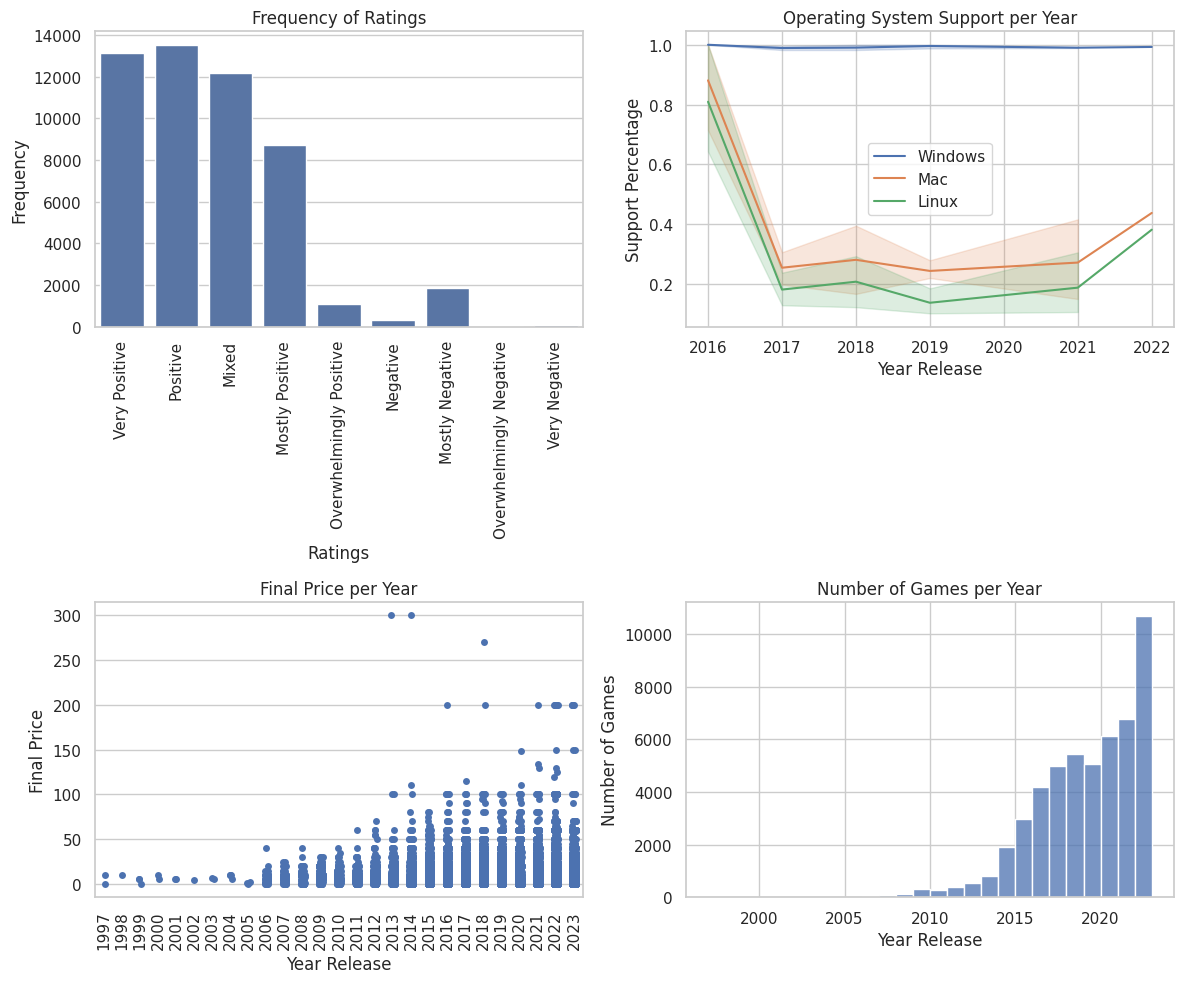

In [164]:
# Data Visualzations


# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart of Steam game/add-on descriptive ratings
sns.countplot(x='rating', data=steam_games, ax=axes[0, 0])
axes[0, 0].set_xlabel('Ratings')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Frequency of Ratings')
axes[0, 0].tick_params(axis='x', rotation=90)

# Line plot of OS supports per year release
# OS support percent by year release
win_support_percentage = steam_games.groupby('year_release')['win'].value_counts(normalize=True).loc[:, True]
mac_support_percentage = steam_games.groupby('year_release')['mac'].value_counts(normalize=True).loc[:, True]
linux_support_percentage = steam_games.groupby('year_release')['linux'].value_counts(normalize=True).loc[:, True]
# Assign support percentages to data columns
steam_games['win_support_percentage'] = win_support_percentage
steam_games['mac_support_percentage'] = mac_support_percentage
steam_games['linux_support_percentage'] = linux_support_percentage
# Graph line plot
sns.lineplot(data=steam_games, x='year_release', y='win_support_percentage', label='Windows', ax=axes[0, 1])
sns.lineplot(data=steam_games, x='year_release', y='mac_support_percentage', label='Mac', ax=axes[0, 1])
sns.lineplot(data=steam_games, x='year_release', y='linux_support_percentage', label='Linux', ax=axes[0, 1])
axes[0, 1].set_xlabel('Year Release')
axes[0, 1].set_ylabel('Support Percentage')
axes[0, 1].set_title('Operating System Support per Year')
axes[0, 1].legend()

# Strip plot of final game/add-on price per year release
sns.stripplot(data=steam_games, x='year_release', y='price_final', ax=axes[1, 0])
axes[1, 0].set_xlabel('Year Release')
axes[1, 0].set_ylabel('Final Price')
axes[1, 0].set_title('Final Price per Year')
axes[1, 0].tick_params(axis='x', rotation=90)

# Histogram distribution of Steam games/add-ons by year release. One bin = one year.
sns.histplot(data=steam_games, x='year_release', bins=26, ax=axes[1, 1])
axes[1, 1].set_xlabel('Year Release')
axes[1, 1].set_ylabel('Number of Games')
axes[1, 1].set_title('Number of Games per Year')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Frequency of descriptive ratings are represented by the bar graph. Most games/add-ons have a 'very positive', 'positive', or 'mixed' rating. Few games/add-ons have 'overwhelmingly positive', 'negative', and 'mostly negative' ratings. It is extremely rare for games/add-ons to have 'overwhemingly negative' and 'very negative' ratings.


Every year, all or nearly all games/add-ons have Windows support. Most 2016 games/add-ons had Mac and Linux support. Approximately 20% to 25% of 2017 games/add-ons had Mac and Linux support. Games/add-ons from 2018 to 2022 gradually implement more support for Mac and Linux.


From 1997 to 2005, game/add-on prices were lower than ```$25.``` Game/add-on prices gradually increased from 2006. Early 2010s through 2023 have more frequent outliers with higher prices. Outlier prices approximately range from ```$100``` to ```$300.``` All years have free games/add-ons. However, the frequency of more expensive games increase.

There are not a noticable amount games/add-ons on Steam until around 2010. Number of games/add-ons gradually increase until 2015. A larger increase occurs from 2015 to 2022. Year 2023 has a drastic jump in the number of games.

Training MSE score: 130.7497206711929
Training R2 score: 0.002519143540441915
Testing MSE score: 138.37222846098584
Testing R2 score: 0.00122206045853257


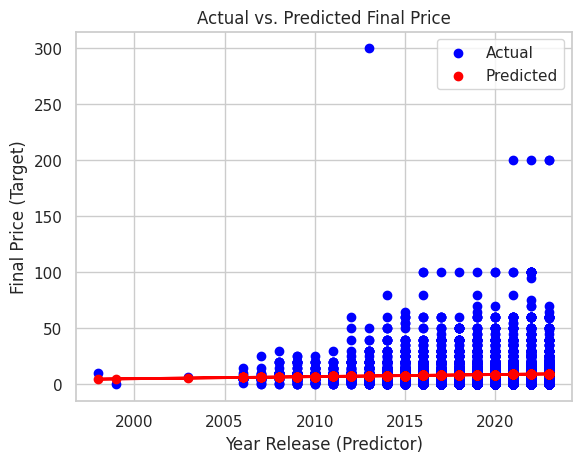

In [165]:
# Machine Learning Model


# Algorithms for training and testing data
from sklearn.model_selection import train_test_split
# Imports linear model for training data
from sklearn import linear_model
# Algorithms for evaluating model accuracy
from sklearn.metrics import mean_squared_error, r2_score

# Year release is predictor variable
X = steam_games[['year_release']]
# Final price is target variable
Y = steam_games['price_final']

# Splits dataset into training and testing sets. Testing size is 20% of dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create linear regression model
model = linear_model.LinearRegression()
# Train simple linear regression model using training data
model.fit(X_train, Y_train)

# Predictions based on training set
Y_train_pred = model.predict(X_train)
# Predictions based on testing set
Y_test_pred = model.predict(X_test)

# Mean squared error of training set
train_mse = mean_squared_error(Y_train, Y_train_pred)
# R-squared of training set
train_r2 = r2_score(Y_train, Y_train_pred)

# Mean squared error of testing set
test_mse = mean_squared_error(Y_test, Y_test_pred)
# R-squared of testing set
test_r2 = r2_score(Y_test, Y_test_pred)

# Display MSE of training set
print("Training MSE score: " + str(train_mse))
# Display R-squared of training set
print("Training R2 score: " + str(train_r2))
# Display MSE of testing set
print("Testing MSE score: " + str(test_mse))
# Display R-squared of testing set
print("Testing R2 score: " + str(test_r2))

# Actual values of final price on testing set
plt.scatter(X_test, Y_test, color='blue', label='Actual')
# Predicted values of final price on testing set
plt.scatter(X_test, Y_test_pred, color='red', label='Predicted')
# Best fit line on predicted values
plt.plot(X_test, Y_test_pred, color='red', linewidth=2)
plt.xlabel('Year Release (Predictor)')
plt.ylabel('Final Price (Target)')
plt.title('Actual vs. Predicted Final Price')
plt.legend()
plt.show()

The graph has very low r2 scores, which means the year release does not explain the variability in the final price. For training, mean squared error (MSE) is 134. Meanwhile, testing MSE is 125. Since final prices can range from ```$0``` to ```$300```, the MSE is too high for an accurate best fit line. The best fit line increases little relative to variability of the data. Year release and final price have a very weak positive correlation.
